<a href="https://colab.research.google.com/github/oliviachchoi/KaggleStudies/blob/main/NY_TAXI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NYC TAXI TRIP DURATION
https://www.kaggle.com/c/nyc-taxi-trip-duration/data

***Data Explanation***
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server 
(Y=store and forward; N=not a store and forward trip)
- trip_duration - duration of the trip in seconds

The competition dataset is based on the **2016 NYC Yellow Cab trip record data** made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/kaggle/newyork taxi/train.csv')
test=pd.read_csv('/content/drive/MyDrive/kaggle/newyork taxi/test.csv')

In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


#Data 뜯어보기

In [ ]:
print('Unique ID counts: ', len(train.id.unique()))

Unique ID counts:  1458644


In [ ]:
train.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

#Datetime
2. (중)Data에서 pickup_datetime을 날짜 형식으로 바꾸시오.
pickup_datetime 을 month, day, weekday, hour, dayoweek으로 바꾸어서 출력하시오

pickup datetime

In [ ]:
#1. pickup datetime
import datetime
#train
train['pickup_datetime']= pd.to_datetime(train['pickup_datetime'])
train['pickup_month']=train['pickup_datetime'].dt.strftime('%m').astype(int)
train['pickup_day']=train['pickup_datetime'].dt.strftime('%d').astype(int)
train['pickup_hour']=train['pickup_datetime'].dt.strftime('%H').astype(int)
train['pickup_dayofweek']=train['pickup_datetime'].dt.dayofweek
train['pickup_weekday'] = (train.pickup_dayofweek // 5 == 1).astype(int)

In [ ]:
#test data 
test['pickup_datetime']= pd.to_datetime(test['pickup_datetime'])
test['pickup_month']=test['pickup_datetime'].dt.strftime('%m').astype(int)
test['pickup_day']=test['pickup_datetime'].dt.strftime('%d').astype(int)
test['pickup_hour']=test['pickup_datetime'].dt.strftime('%H').astype(int)
test['pickup_dayofweek']=test['pickup_datetime'].dt.dayofweek
test['pickup_weekday'] = (test.pickup_dayofweek // 5 == 1).astype(int)

In [ ]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,0,6,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,13,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,8,13,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,10,7,6,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,22,6,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,5,15,1,0


In [ ]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,6,30,23,3,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,6,30,23,3,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,6,30,23,3,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,6,30,23,3,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,6,30,23,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,1,1,0,4,0
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,1,1,0,4,0
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,1,1,0,4,0
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,1,1,0,4,0


In [ ]:
train.pickup_weekday

0          0
1          1
2          0
3          0
4          1
          ..
1458639    0
1458640    1
1458641    0
1458642    0
1458643    0
Name: pickup_weekday, Length: 1458644, dtype: int64

1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: pickup_month, dtype: int64


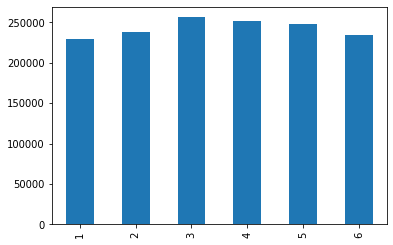

In [ ]:
print(train.pickup_month.value_counts().sort_index())
train.pickup_month.value_counts().sort_index().plot(kind='bar')
#month는 다 비슷비슷해보이지만 그 중에서도 3월에 이용객이 가장 많음

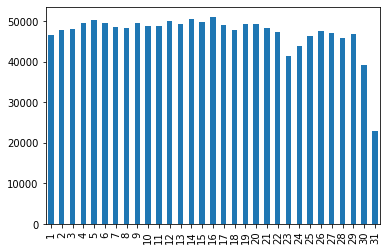

In [ ]:
# print(train.date.value_counts().sort_index())
train.pickup_day.value_counts().sort_index().plot(kind='bar')
#거의 비슷비슷한데 31일은 모든 월에 없기 때문에 적어보임

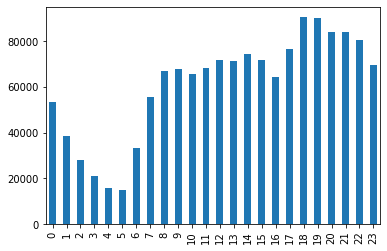

In [ ]:
train.pickup_hour.value_counts().sort_index()
train.pickup_hour.value_counts().sort_index().plot(kind='bar')
#탑승 시간 별 count
#새벽시간 00-06까지는 잘 안탐
#6pm - 10pm 에 이용객이 제일 몰려있음 : 퇴근길에 자주 이용하는 것 처럼 보임

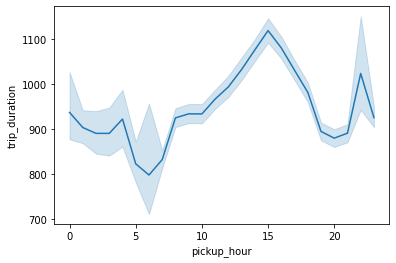

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration', data=train)
#15시, 22시에 trip duration이 비교적 길게 나오고
#5-6시에는 trip duration이 적게 나옴.

0    187418
6    195366
1    202749
2    210136
3    218574
5    220868
4    223533
Name: pickup_dayofweek, dtype: int64


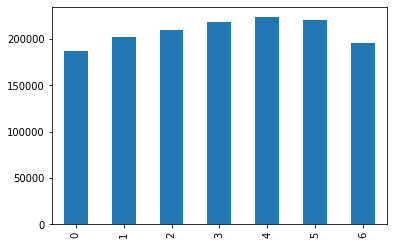

In [ ]:
#0: Monday ~ 6: Sunday
print(train.pickup_dayofweek.value_counts().sort_values())
train.pickup_dayofweek.value_counts().sort_index().plot(kind='bar')
#목, 금, 토에 많이 이용하고, (월,일)은 비교적 적게 이용함

0    1042410
1     416234
Name: pickup_weekday, dtype: int64
주중 하루 평균 이용객 : 208482.0 주말 하루 평균 이용객 : 208117.0


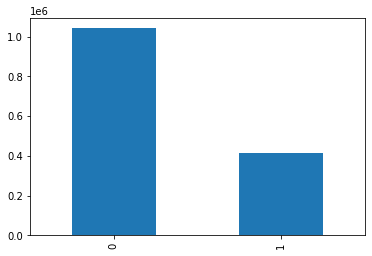

In [ ]:
print(train.pickup_weekday.value_counts())
print('주중 하루 평균 이용객 :', 1042410/5,'주말 하루 평균 이용객 :',416234/2)
train.pickup_weekday.value_counts().sort_index().plot(kind='bar')
#주중에 더 많이 몰린 것 처럼 보이지만, 하루 평균 이용객으로 나눠서 보면
#평일에 slightly 몰려있음을 알 수 있다. 

In [ ]:
#corr
train.corr().round(2).trip_duration

vendor_id            0.02
passenger_count      0.01
pickup_longitude     0.03
pickup_latitude     -0.03
dropoff_longitude    0.01
dropoff_latitude    -0.02
trip_duration        1.00
pickup_month         0.01
pickup_day           0.00
pickup_hour          0.00
pickup_dayofweek    -0.00
pickup_weekday      -0.00
Name: trip_duration, dtype: float64

dropoff datetime

In [ ]:
train['dropoff_datetime']= pd.to_datetime(train['dropoff_datetime'])
train['dropoff_month']=train['dropoff_datetime'].dt.strftime('%m').astype(int)
train['dropoff_hour']=train['dropoff_datetime'].dt.strftime('%H').astype(int)
train['dropoff_day']=train['dropoff_datetime'].dt.strftime('%d').astype(int)
train['dropoff_dayofweek']=train['dropoff_datetime'].dt.dayofweek
train['dropoff_weekday'] = (train.dropoff_dayofweek // 5 == 1).astype(int)

1    229656
2    238292
3    256135
4    251636
5    248555
6    234243
7       127
Name: dropoff_month, dtype: int64


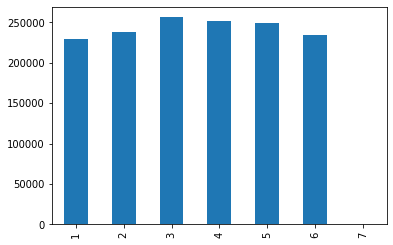

In [ ]:
print(train.dropoff_month.value_counts().sort_index())
train.dropoff_month.value_counts().sort_index().plot(kind='bar')
#pickup에서는 보이지 않던 7월 데이터가 있다?

In [ ]:
train[(train.dropoff_month==7)].max()
#하루 -> 86400 max값도 하루를 넘지는 않음.. 그냥 오랜 trip을 즐긴것 같다.

id                              id3952659
vendor_id                               2
pickup_datetime       2016-06-30 23:59:39
dropoff_datetime      2016-07-01 23:02:03
passenger_count                         6
pickup_longitude                 -73.7813
pickup_latitude                   40.8264
dropoff_longitude                -73.7764
dropoff_latitude                  40.8567
store_and_fwd_flag                      N
trip_duration                       86387
pickup_month                            6
pickup_day                             30
pickup_hour                            23
pickup_dayofweek                        3
pickup_weekday                          0
dropoff_month                           7
dropoff_hour                           23
dropoff_day                             1
dropoff_dayofweek                       4
dropoff_weekday                         0
dtype: object

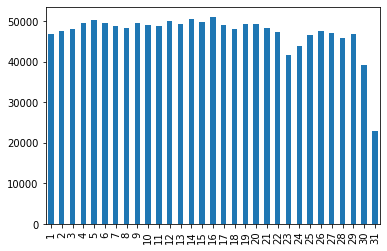

In [ ]:
# print(train.date.value_counts().sort_index())
train.dropoff_day.value_counts().sort_index().plot(kind='bar')

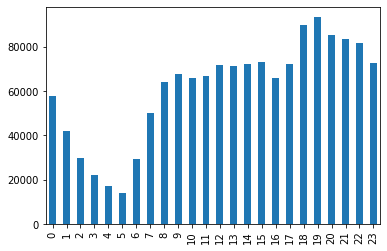

In [ ]:
train.dropoff_hour.value_counts().sort_index()
train.dropoff_hour.value_counts().sort_index().plot(kind='bar')
#pickup과 비슷한 그래프의 형태를 보임. 새벽에 적고 저녁시간에 몰림

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


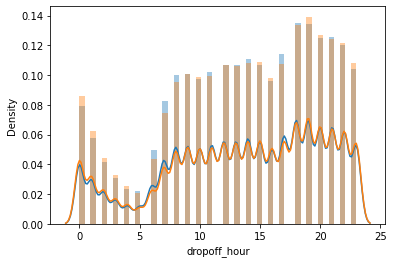

In [ ]:
figsize=(10,10)
sns.distplot(a=train.pickup_hour, hist=True)
sns.distplot(a=train.dropoff_hour,hist=True)

4    223031
5    220902
3    217746
2    209790
1    202518
6    197224
0    187433
Name: dropoff_dayofweek, dtype: int64


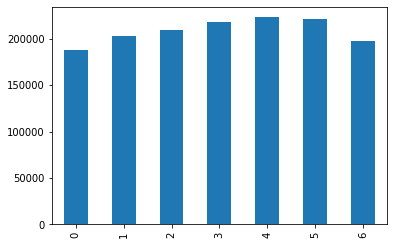

In [ ]:
#0: Monday ~ 6: Saturday
print(train.dropoff_dayofweek.value_counts())
train.dropoff_dayofweek.value_counts().sort_index().plot(kind='bar')

0    1040518
1     418126
Name: dropoff_weekday, dtype: int64
주중 하루 평균 이용객 : 208103.6 주말 하루 평균 이용객 : 209063.0


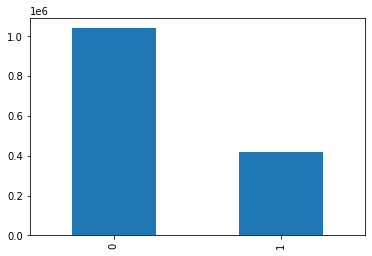

In [ ]:
print(train.dropoff_weekday.value_counts())
print('주중 하루 평균 이용객 :', 1040518/5,'주말 하루 평균 이용객 :',418126/2)
train.dropoff_weekday.value_counts().sort_index().plot(kind='bar')

#Trip Duration

1. (하)타겟 변수를 확인하고 이상치가 존재하는지 파악하시오
이상치를 확인하고, plot을 하시오. 
정규분포 형식으로 바꾸어서 plot을 하시오.

In [ ]:
train.trip_duration

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
print(train.trip_duration.max()) #약 40일
print(train.trip_duration.min()) #1초

3526282
1


In [ ]:
train.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


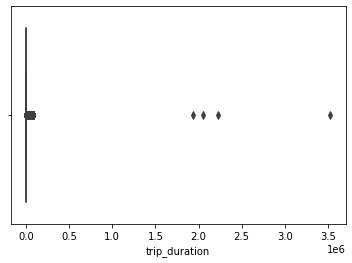

In [ ]:
sns.boxplot(train.trip_duration)

In [ ]:
#log-transformation to reduce the effects of the outliers
train['log_trip_duration']=np.log1p(train.trip_duration.values)

(array([3.30000e+01, 1.77000e+02, 3.18000e+02, 6.01000e+02, 4.10000e+02,
        6.27000e+02, 4.78000e+02, 7.27000e+02, 9.26000e+02, 1.09600e+03,
        1.38500e+03, 2.34600e+03, 4.54100e+03, 1.02530e+04, 2.17410e+04,
        4.54460e+04, 8.05240e+04, 1.27788e+05, 1.75930e+05, 2.14182e+05,
        2.25253e+05, 2.05072e+05, 1.55983e+05, 9.72090e+04, 4.95850e+04,
        2.28680e+04, 8.62500e+03, 2.06600e+03, 2.88000e+02, 5.80000e+01,
        3.10000e+01, 9.00000e+00, 2.30000e+01, 3.20000e+01, 2.80000e+01,
        3.50000e+01, 2.24000e+02, 1.72200e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([ 0.69314718,  0.98079933,  1.26845149,  1.55610364,  1.8437558 ,
         2.13140795,  2.41906011,  2.70671226,  2.99436442,  3.28201657,
         3.56966872,  3.85732088,  4.14497303,  4.43262519,  4.72027734,
         5.0079295 ,  5.29558165,  5.58323381,  5

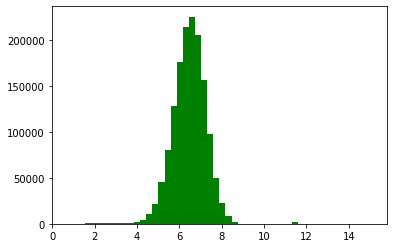

In [ ]:
#정규분포의 형태
plt.hist(train.log_trip_duration, bins=50, color='green')

In [ ]:
print(train.log_trip_duration.max())
print(train.log_trip_duration.min())

15.075754899638106
0.6931471805599453


#passenger count

 Crew members (if any), as well as the driver or pilot of the vehicle, are usually not considered to be passengers.

 Which means that 0 means the driver drove the car by him/herself.

In [ ]:
train.passenger_count.value_counts().sort_index()
#0 -> no passenger

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

In [ ]:
#drop zero values 
train=train[train.passenger_count!=0].reset_index()
train.drop('index', axis=1, inplace=True)

In [ ]:
train.passenger_count.value_counts().sort_index()

1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

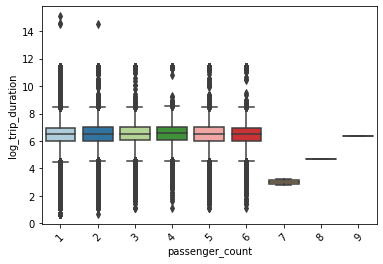

In [ ]:
plt.xticks(rotation=45)
sns.boxplot(x='passenger_count', y='log_trip_duration',data=train,palette='Paired')

(array([4.000e+00, 2.000e+00, 8.000e+00, 6.000e+00, 1.100e+01, 1.600e+01,
        1.800e+01, 4.600e+01, 8.700e+01, 2.120e+02, 5.530e+02, 1.397e+03,
        2.927e+03, 4.908e+03, 7.220e+03, 8.751e+03, 8.597e+03, 6.778e+03,
        3.949e+03, 1.776e+03, 7.210e+02, 1.950e+02, 1.700e+01, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 1.260e+02]),
 array([ 1.09861229,  1.44087482,  1.78313736,  2.12539989,  2.46766242,
         2.80992496,  3.15218749,  3.49445002,  3.83671256,  4.17897509,
         4.52123762,  4.86350016,  5.20576269,  5.54802522,  5.89028776,
         6.23255029,  6.57481282,  6.91707536,  7.25933789,  7.60160042,
         7.94386296,  8.28612549,  8.62838802,  8.97065056,  9.31291309,
         9.65517563,  9.99743816, 10.33970069, 10.68196323, 11.02422576,
        11.36648829]),
 <a list of 30 Patch objects>)

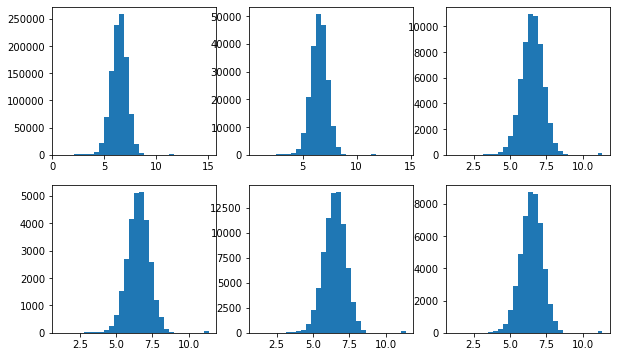

In [ ]:
fig, axes= plt.subplots(2,3,figsize=(10,6))
axes[0][0].hist(train[train.passenger_count==1].log_trip_duration,bins=30)
axes[0][1].hist(train[train.passenger_count==2].log_trip_duration,bins=30)
axes[0][2].hist(train[train.passenger_count==3].log_trip_duration,bins=30)
axes[1][0].hist(train[train.passenger_count==4].log_trip_duration,bins=30)
axes[1][1].hist(train[train.passenger_count==5].log_trip_duration,bins=30)
axes[1][2].hist(train[train.passenger_count==6].log_trip_duration,bins=30)

In [ ]:
print('1명 :', train[train.passenger_count==1].trip_duration.mean())
print('2명 :', train[train.passenger_count==2].trip_duration.mean())
print('3명 :', train[train.passenger_count==3].trip_duration.mean())
print('4명 :', train[train.passenger_count==4].trip_duration.mean())
print('5명 :', train[train.passenger_count==5].trip_duration.mean())
print('6명 :', train[train.passenger_count==6].trip_duration.mean())
# print('7명 :', train[train.passenger_count==7].trip_duration.mean())
# print('8명 :', train[train.passenger_count==8].trip_duration.mean())
# print('9명 :', train[train.passenger_count==9].trip_duration.mean())

1명 : 930.3997532751514
2명 : 1005.4583345220095
3명 : 1028.236276212101
4명 : 1053.5297493310802
5명 : 1070.2321739575864
6명 : 1061.35522313947


Trip duration의 그래프와 mean을 보았을 때, 대체적으로 승객의 수가 적을 수록 trip duration이 짧게 나타나는 것을 확인 할 수 있다. 

여러 명 탔을 때 먼 곳으로 놀러가려는 의향..?maybe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


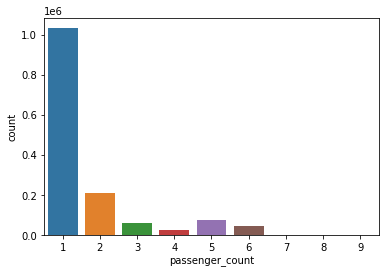

In [ ]:
sns.countplot(train.passenger_count)
others=train[train.passenger_count!=1]
#1이 압도적으로 많으니까 다른 숫자들로만 비교 해보기

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


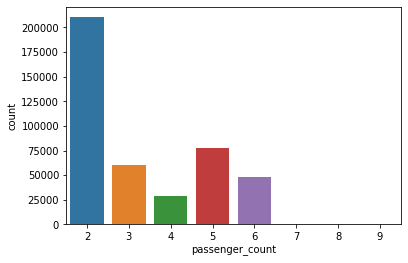

In [ ]:
print(train.passenger_count.value_counts())
sns.countplot(others.passenger_count)
#2명-> 5명 -> 3-> 6 등.. 약간 감소하는 그래프

탑승객(고객) 이 한명 인 경우가 가장 많지만, trip duration이 가장 긴 경우는 5명일 경우이다

#pickup_longitude,	pickup_latitude,	dropoff_longitude,	dropoff_latitude

(상) 거리변수에 대해서 측정하시오
위도와 경도에 따라서 거리를 계산해보고, 그 거리가 틀리다면, 새로운 좌표계를 도입하여서 출력하시오.

In [ ]:
print(train.pickup_longitude.min(),train.pickup_longitude.max())
print(train.pickup_latitude.min(),train.pickup_latitude.max())
print(train.dropoff_longitude.min(),train.dropoff_longitude.max())
print(train.dropoff_latitude.min(),train.dropoff_latitude.max())

-121.93334197998048 -61.33552932739258
34.359695434570305 51.88108444213867
-121.9333038330078 -61.33552932739258
32.1811408996582 43.92102813720703


5.  데이터에 이상치가 있다면 처리하고 이유를 밝히시오.
데이터에 이상치가 있다면 처리하고 이유를 명백히 밝히시오.

https://www.fcc.gov/media/radio/dms-decimal

NYC coordinates

west, south, east, north = -74.03, 40.63, -73.77, 40.85

적용해서 이상치 제거



In [ ]:
#train
train1=train[(40.63<=train['pickup_latitude'])&(train['pickup_latitude']<=40.85)&(train['pickup_longitude']>=-74.03) & (train['pickup_longitude']<=-73.77)]
train1=train1[(40.63<=train1['dropoff_latitude'])&(train1['dropoff_latitude']<=40.85)&(train1['dropoff_longitude']>=-74.03) & (train1['dropoff_longitude']<=-73.77)]

In [ ]:
#test
test1=test[(40.63<=train['pickup_latitude'])&(test['pickup_latitude']<=40.85)&(test['pickup_longitude']>=-74.03)&(test['pickup_longitude']<=-73.77)]
test1=test1[(40.63<=test1['dropoff_latitude'])&(test1['dropoff_latitude']<=40.85)&(test1['dropoff_longitude']>=-74.03) & (test1['dropoff_longitude']<=-73.77)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
print(train.pickup_latitude.max())
print(train1.pickup_latitude.max())
#적어도 NY boundary 내에서 하는 게 맞다고 생각해서 범위에서 벗어난 것들을 drop 시킴

51.88108444213867
40.849998474121094


In [ ]:
print(test.pickup_latitude.min())
print(test1.pickup_latitude.min())
print('-------------------')
print(test.pickup_longitude.min())
print(test1.pickup_longitude.min())

37.38958740234375
40.59178161621094
-------------------
-121.9331283569336
-74.0298843383789


In [ ]:
#실제로 벗어난 값의 coordinate을 찾아보면 CA에 있기 때문에, drop을 결정
test[test.pickup_latitude==test.pickup_latitude.min()]


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday
324125,id0505885,2,2016-03-29 14:28:46,2,-121.933128,37.389587,-121.933327,37.389374,N,3,29,14,1,0


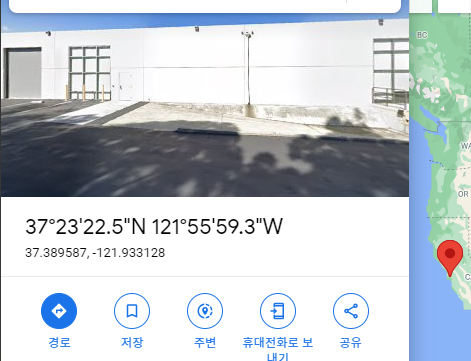

---------

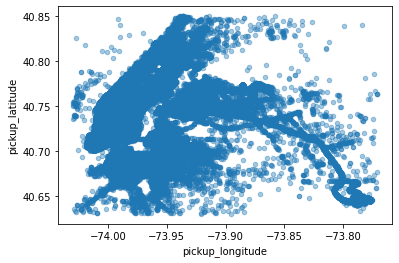

In [ ]:
train1.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',alpha=0.4)
plt.show()

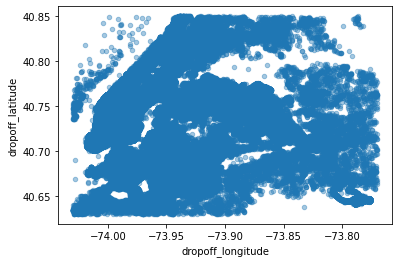

In [ ]:
train1.plot(kind='scatter',x='dropoff_longitude',y='dropoff_latitude',alpha=0.4)
plt.show()

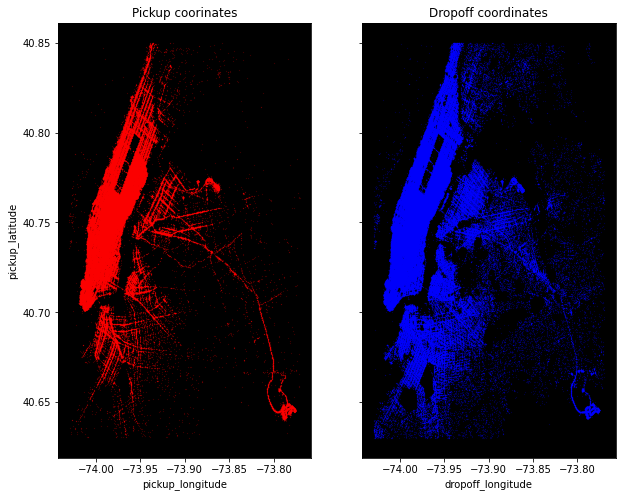

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,8))

train1.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='red', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickup coorinates")
ax1.set_facecolor('black')

train1.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='blue', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoff coordinates")
ax2.set_facecolor('black') 

In [ ]:
#folium 이용해서 plot그리기
!pip install folium
import folium
folium.__version__

'0.8.3'

In [ ]:
lat = train1['pickup_latitude'].mean()
long = train1['pickup_longitude'].mean()
m=folium.Map([lat,long],zoom_start=12)
m

In [ ]:
for i in range(50):
  sub_lat= train1.loc[i,'pickup_latitude']
  sub_long= train1.loc[i,'pickup_longitude']

  title= train1.loc[i,'pickup_month']

  folium.Marker([sub_lat,sub_long],tooltip = title).add_to(m)
m

3. (상) 거리변수에 대해서 측정하시오
위도와 경도에 따라서 거리를 계산해보고, 그 거리가 틀리다면, 새로운 좌표계를 도입하여서 출력하시오.

In [ ]:
# !pip install haversine

In [ ]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lon1 = row['pickup_longitude']
    lat1 = row['pickup_latitude']
    lon2 = row['dropoff_longitude']
    lat2 = row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km
  

In [ ]:
train1['distance']=0.0
train1['distance']= train1.apply(lambda row: haversine(row),axis=1)

In [ ]:
test1['distance']=0.0
test1['distance']= test1.apply(lambda row: haversine(row),axis=1)

In [ ]:
train1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,dropoff_month,dropoff_hour,dropoff_day,dropoff_dayofweek,dropoff_weekday,log_trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,17,0,0,3,17,14,0,0,6.122493,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,0,6,1,6,0,12,6,1,6.498282,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,11,1,0,1,12,19,1,0,7.661527,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,19,2,0,4,19,6,2,0,6.063785,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,13,5,1,3,13,26,5,1,6.077642,1.187842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458579,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,8,13,4,0,4,13,8,4,0,6.658011,1.224311
1458580,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,10,7,6,1,1,7,10,6,1,6.486161,6.046037
1458581,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,22,6,4,0,4,7,22,4,0,6.639876,7.819693
1458582,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,5,15,1,0,1,16,5,1,0,5.924256,1.091878


In [ ]:
train1[train1['distance']==train1.distance.max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,dropoff_month,dropoff_hour,dropoff_day,dropoff_dayofweek,dropoff_weekday,log_trip_duration,distance
87723,id1896190,1,2016-04-29 06:12:36,2016-04-29 06:58:11,1,-73.789116,40.641712,-73.990295,40.832928,N,2735,4,29,6,4,0,4,6,29,4,0,7.914252,27.174557


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


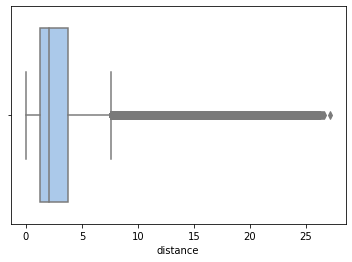

In [ ]:
sns.set_palette("pastel")
sns.boxplot(train1.distance)

In [ ]:
train1.distance.describe()

count    1.438573e+06
mean     3.289766e+00
std      3.658869e+00
min      0.000000e+00
25%      1.223799e+00
50%      2.066599e+00
75%      3.763867e+00
max      2.717456e+01
Name: distance, dtype: float64

In [ ]:
#IQR
q1= np.percentile(train1.distance,25)
q3=np.percentile(train1.distance,75)
iqr=q3-q1
print(q3+7.5*iqr)


print(len(train1[train1.distance>=(q3+7.5*iqr)]))
# train[train.distance>=(q3+100*iqr)]

22.814377137551553
1419


In [ ]:
#거(km) =속(km/h)*시(h)
#is that literally possible tho?
# 1240/(792/(60*60))

In [ ]:
print(len(train1[train1['distance']==train1.distance.min()]))
print(train1.shape)
#should i include the zeros? or drop?
#일단 보류
#too much variables to drop -> leave them in

5367
(1438573, 23)


#Feature engineering -> Speed

거속시

my question here is 
do we need to log() speed and distance?
or can we just leave it like this..?

In [ ]:
#km/h
train1['speed']=train1.distance/ (train1.trip_duration/3600) #sec-> hr

In [ ]:
test1['speed']=test1.distance/ (train1.trip_duration/3600)

In [ ]:
print(train1.speed.min())
print(train1.speed.max())
#9269?
#200-300 = fast trains.. ex) ktx 
#NY 한 가운데서 ktx보다 빨리 달리는 경우는 거의 없기 때문에 drop 시키기.

0.0
9269.013572095522


In [ ]:
print(test1.speed.min())
print(test1.speed.max())

0.0
72466.55918731343


In [ ]:
#200 넘은 거는 삭제 해도 될 것 같다.
len(train1[train1.speed>200]) 
train1=train1[train1.speed<=200]
test1=test1[test1.speed<=200]

In [ ]:
print(train1.shape)
print(test1.shape)

(1438526, 24)
(600249, 16)


60 이상 : 455
60 이하: 1438071
최대값은? 195.01348333423655


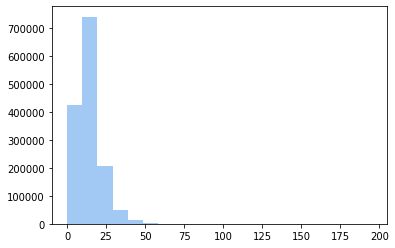

In [ ]:
print('60 이상 :',len(train1[train1.speed>=60]) )
print('60 이하:',len(train1[train1.speed<60]) )
print('최대값은?',train1.speed.max())

plt.hist(train1.speed,bins=20)

plt.show()
#거의 대부분 0-50 사이에 있다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


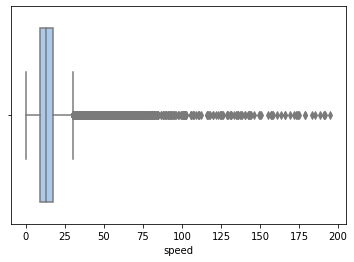

In [ ]:
sns.boxplot(train1.speed)

In [ ]:
hour_grouped= train1.pivot_table(values='speed',index='pickup_hour',aggfunc=np.median)

In [ ]:
hour_grouped

,speed
pickup_hour,
0,15.838485
1,16.742818
2,17.309036
3,18.223648
4,20.083957
5,22.286477
6,18.834520
7,14.207929
8,11.336949


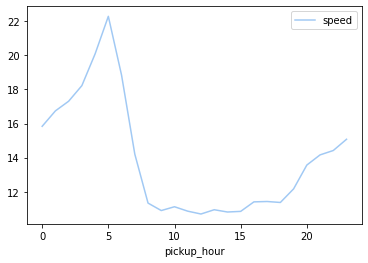

In [ ]:
hour_grouped.plot()

#store and fwd flag

4. 범주형 변수를 원 핫 인코딩을 하시오.
데이터 내에 범주형 변수가 있으면, 원 핫 인코딩을 하고 출력하시오.(train,test에 모두 적용하시오.)
또한 원래 데이터에서 drop하시오.

N    1430652
Y       7874
Name: store_and_fwd_flag, dtype: int64


Text(0.5, 1.0, 'store and fwd value counts')

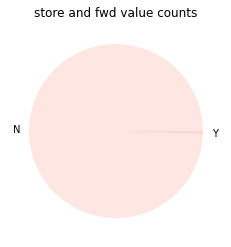

In [ ]:
print(train1.store_and_fwd_flag.value_counts())
sequential_colors = sns.color_palette("RdPu", 10)
plt.pie(train1.store_and_fwd_flag.value_counts(),labels=train1.store_and_fwd_flag.unique(),colors=sequential_colors)
plt.title('store and fwd value counts')
#N가 Y보다 압도적으로 많다

In [ ]:
#get dummies 로 one hot encoding 실시

train1=pd.get_dummies(train1, columns=['store_and_fwd_flag'],prefix='dmy')
test1=pd.get_dummies(test1, columns=['store_and_fwd_flag'],prefix='dmy')


<05.26 머신러닝 기반 데이터 분석>

1. Train과 Test를 분리하고, 실제 분석에 필요한 부분만 남기고 drop하시오.
Train과 Test를 분리하고, 실제 분석에 필요하지 않은 부분을 drop하시오.(왜 drop을 했는지 명백히 밝히시오)
2. 2가지 이상의 머신러닝 모델을 적용해보고 비교해보시오.
어떠한 것이 좋은지 밝히시오.
3. 적용해 본 모델의 하이퍼 파라미터 최적화 하시오.
적용 해 본 모델의 하이퍼 파라미터를 최적화 하시오.(변수 2개 이상)
4. OLS 방법을 적용해보시오.
적용한 코드와 summary도 밝히고 결과를 해석하시오.
5. Feature importance or Engineering 방법을 해석하고 모델에 적용하시오.
Feature Importance or engineering 방법을 사용하여, 모델을 해석하거나 적용하시오.

In [ ]:
train1.drop('id',axis=1,inplace=True)
train1

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,dropoff_month,dropoff_hour,dropoff_day,dropoff_dayofweek,dropoff_weekday,log_trip_duration,distance,speed,dmy_N,dmy_Y
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17,0,0,3,17,14,0,0,6.122493,1.497580,11.848984,1,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0,6,1,6,0,12,6,1,6.498282,1.804374,9.797504,1,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11,1,0,1,12,19,1,0,7.661527,6.381090,10.815406,1,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19,2,0,4,19,6,2,0,6.063785,1.484566,12.457894,1,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13,5,1,3,13,26,5,1,6.077642,1.187842,9.830418,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458579,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,778,4,8,13,4,0,4,13,8,4,0,6.658011,1.224311,5.665192,1,0
1458580,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,655,1,10,7,6,1,1,7,10,6,1,6.486161,6.046037,33.230128,1,0
1458581,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,764,4,22,6,4,0,4,7,22,4,0,6.639876,7.819693,36.846722,1,0
1458582,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,373,1,5,15,1,0,1,16,5,1,0,5.924256,1.091878,10.538232,1,0


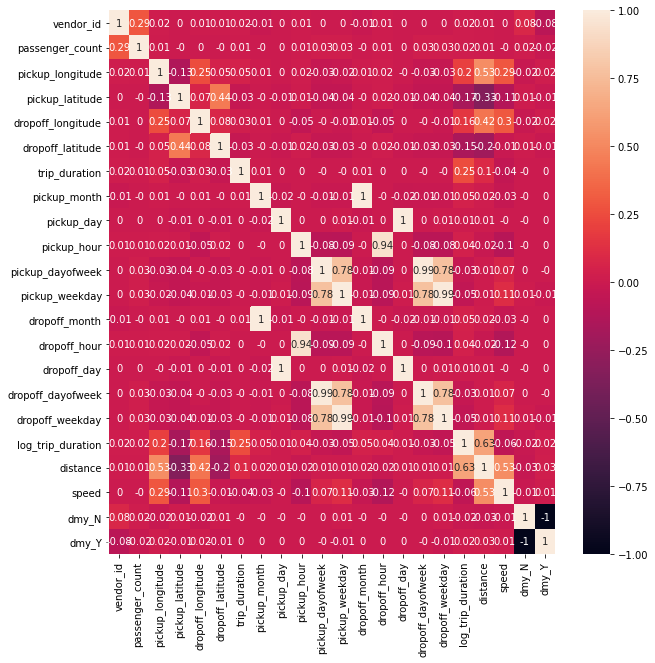

In [ ]:
plt.figure(figsize=(10, 10))
corr_train=train1.corr().round(2)
sns.heatmap(corr_train, annot=True)

In [ ]:
test1.drop('id',axis=1, inplace=True)
test1

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,distance,speed,dmy_N,dmy_Y
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,6,30,23,3,0,2.744701,21.716319,1,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,6,30,23,3,0,2.757507,14.972886,1,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,6,30,23,3,0,1.305335,2.212433,1,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,6,30,23,3,0,5.265780,44.188360,1,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,6,30,23,3,0,0.960239,7.946802,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625128,1,2016-01-01 00:03:00,1,-73.973167,40.764042,-73.974464,40.757187,1,1,0,4,0,0.769547,7.329017,1,0
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,1,0,4,0,0.966830,4.389141,1,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,1,0,4,0,6.192453,109.816901,1,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,1,0,4,0,8.148600,41.085378,1,0


#Dropped variables

1. Train
- id -> 분석에 필요 없다고 생각 : 의미 없는 숫자
- dropoff_datetime -> pickup과 dropoff를 이용해서 trip_duration 구할 수 있음 & test set과 shape 맞추기 위해서 
- pickup_datetime -> 다른 변수들로 바꿔줌

2. Test
- id -> 위와 동일
- pickup_datetime -> feature engineering으로 각 다른 변수들로 바꿔줌

1. Train과 Test를 분리하고, 실제 분석에 필요한 부분만 남기고 drop하시오.
Train과 Test를 분리하고, 실제 분석에 필요하지 않은 부분을 drop하시오.(왜 drop을 했는지 명백히 밝히시오)

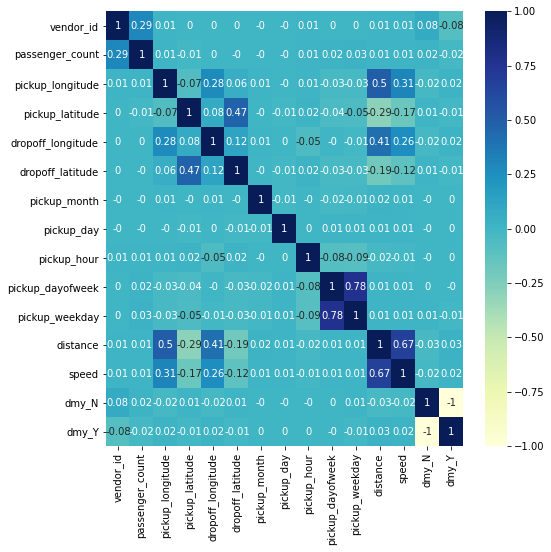

In [ ]:
corr_test=test1.corr().round(2)
plt.figure(figsize=(8, 8))
sns.heatmap(corr_test, annot=True,cmap='YlGnBu')

In [ ]:
train1.drop('dropoff_datetime',axis=1,inplace=True)
train1.drop('pickup_datetime',axis=1,inplace=True)
train1.drop('dropoff_month',axis=1,inplace=True)
train1.drop('dropoff_hour',axis=1,inplace=True)
train1.drop('dropoff_day',axis=1,inplace=True)
train1.drop('dropoff_dayofweek',axis=1,inplace=True)
train1.drop('dropoff_weekday',axis=1,inplace=True)
train1.drop('trip_duration',axis=1,inplace=True) #log_trip_duration으로 대체

In [ ]:
test1.drop('pickup_datetime',axis=1, inplace=True)

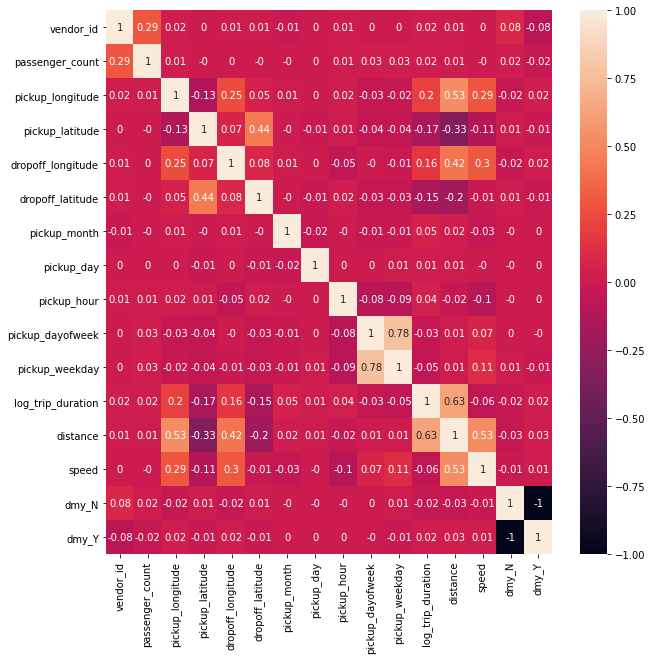

In [ ]:
#after drop
plt.figure(figsize=(10, 10))
corr_train=train1.corr().round(2)
sns.heatmap(corr_train, annot=True)
#afterdrop

In [ ]:
train1

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,log_trip_duration,distance,speed,dmy_N,dmy_Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,3,14,17,0,0,6.122493,1.497580,11.848984,1,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6,12,0,6,1,6.498282,1.804374,9.797504,1,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,1,19,11,1,0,7.661527,6.381090,10.815406,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,4,6,19,2,0,6.063785,1.484566,12.457894,1,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,3,26,13,5,1,6.077642,1.187842,9.830418,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458579,2,4,-73.982201,40.745522,-73.994911,40.740170,4,8,13,4,0,6.658011,1.224311,5.665192,1,0
1458580,1,1,-74.000946,40.747379,-73.970184,40.796547,1,10,7,6,1,6.486161,6.046037,33.230128,1,0
1458581,2,1,-73.959129,40.768799,-74.004433,40.707371,4,22,6,4,0,6.639876,7.819693,36.846722,1,0
1458582,1,1,-73.982079,40.749062,-73.974632,40.757107,1,5,15,1,0,5.924256,1.091878,10.538232,1,0


In [ ]:
test1

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,pickup_weekday,distance,speed,dmy_N,dmy_Y
0,1,1,-73.988129,40.732029,-73.990173,40.756680,6,30,23,3,0,2.744701,21.716319,1,0
1,1,1,-73.964203,40.679993,-73.959808,40.655403,6,30,23,3,0,2.757507,14.972886,1,0
2,1,1,-73.997437,40.737583,-73.986160,40.729523,6,30,23,3,0,1.305335,2.212433,1,0
3,2,1,-73.956070,40.771900,-73.986427,40.730469,6,30,23,3,0,5.265780,44.188360,1,0
4,1,1,-73.970215,40.761475,-73.961510,40.755890,6,30,23,3,0,0.960239,7.946802,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625128,1,1,-73.973167,40.764042,-73.974464,40.757187,1,1,0,4,0,0.769547,7.329017,1,0
625129,1,1,-74.003464,40.725105,-74.001251,40.733643,1,1,0,4,0,0.966830,4.389141,1,0
625130,1,1,-74.006363,40.743782,-73.953407,40.782467,1,1,0,4,0,6.192453,109.816901,1,0
625131,1,2,-73.972267,40.759865,-73.876602,40.748665,1,1,0,4,0,8.148600,41.085378,1,0


2. 2가지 이상의 머신러닝 모델을 적용해보고 비교해보시오. 어떠한 것이 좋은지 밝히시오

종속변수가 연속형 변수이니까, classification method가 아닌 regressor로 적합 해야 할 것 같다.

#XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
x= train1.drop('log_trip_duration',axis=1)
y= train1.log_trip_duration
feature_names = list(x.columns)

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2, random_state=42)

dtrain=xgb.DMatrix(x_train, label=y_train)
dvalid=xgb.DMatrix(x_valid,label=y_valid)
dtest=xgb.DMatrix(test1[feature_names].values)

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
param={'max_depth':10, 'min_child_weight':30, 'booster':'gbtree', 'eval_metric':'rmse',
       'objective':'reg:linear'}

In [ ]:
model=xgb.train(param, dtrain,100, watchlist, early_stopping_rounds=20 )

[06:16:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.20747	valid-rmse:4.20686
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[1]	train-rmse:2.94667	valid-rmse:2.94624
[2]	train-rmse:2.06427	valid-rmse:2.06401
[3]	train-rmse:1.44698	valid-rmse:1.44686
[4]	train-rmse:1.01547	valid-rmse:1.01544
[5]	train-rmse:0.714318	valid-rmse:0.714378
[6]	train-rmse:0.504791	valid-rmse:0.504943
[7]	train-rmse:0.359756	valid-rmse:0.360214
[8]	train-rmse:0.260622	valid-rmse:0.261535
[9]	train-rmse:0.194302	valid-rmse:0.195686
[10]	train-rmse:0.151291	valid-rmse:0.153256
[11]	train-rmse:0.12496	valid-rmse:0.127339
[12]	train-rmse:0.109284	valid-rmse:0.112134
[13]	train-rmse:0.100872	valid-rmse:0.103981
[14]	train-rmse:0.096419	valid-rmse:0.099734
[15]	train-rmse:0.093042	valid-rmse:0.097095
[16]	train-rmse:0.091843	vali

In [ ]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.09394


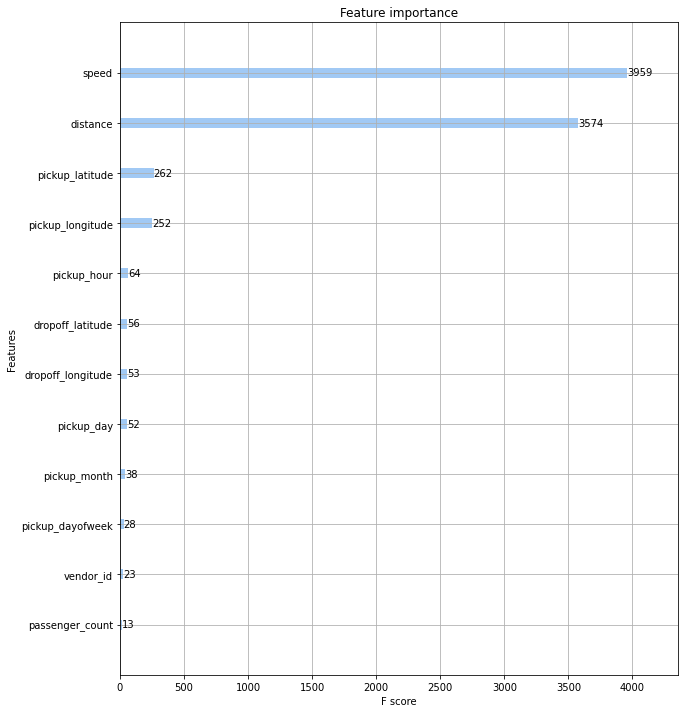

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(model, ax=ax)
plt.show()

#lightgbm

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

hyper param 조정

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

params={'max_depth':50,'metric':'rmse', 'objective':'regression', 'learning_rate':0.1 }
x= train1.drop('log_trip_duration',axis=1)
y= train1.log_trip_duration

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
lgb_train=lgb.Dataset(x_train,y_train)
lgb_test=lgb.Dataset(x_test,y_test)
lgb_model=lgb.train(params, lgb_train,num_boost_round=200, valid_sets=[lgb_train,lgb_test],early_stopping_rounds=20)



[1]	training's rmse: 0.72018	valid_1's rmse: 0.715293
Training until validation scores don't improve for 20 rounds.
[2]	training's rmse: 0.659008	valid_1's rmse: 0.654481
[3]	training's rmse: 0.603976	valid_1's rmse: 0.599551
[4]	training's rmse: 0.553777	valid_1's rmse: 0.549593
[5]	training's rmse: 0.508412	valid_1's rmse: 0.504418
[6]	training's rmse: 0.467892	valid_1's rmse: 0.463989
[7]	training's rmse: 0.431305	valid_1's rmse: 0.427485
[8]	training's rmse: 0.398104	valid_1's rmse: 0.394537
[9]	training's rmse: 0.368548	valid_1's rmse: 0.365155
[10]	training's rmse: 0.342123	valid_1's rmse: 0.338904
[11]	training's rmse: 0.318463	valid_1's rmse: 0.315482
[12]	training's rmse: 0.29696	valid_1's rmse: 0.294069
[13]	training's rmse: 0.277877	valid_1's rmse: 0.275167
[14]	training's rmse: 0.260666	valid_1's rmse: 0.25812
[15]	training's rmse: 0.245487	valid_1's rmse: 0.243055
[16]	training's rmse: 0.232035	valid_1's rmse: 0.229752
[17]	training's rmse: 0.220047	valid_1's rmse: 0.21794

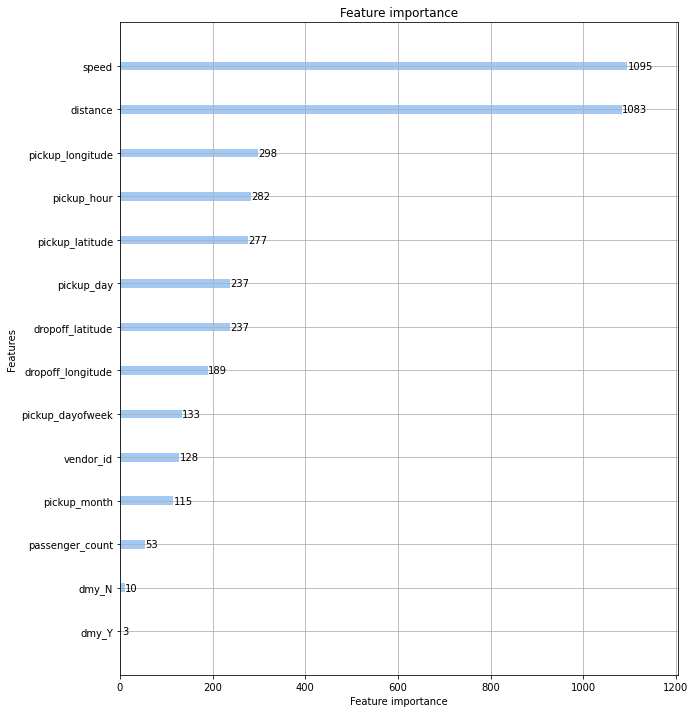

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(lgb_model, ax=ax)
plt.show()

#OLS

4. OLS 방법을 적용해보시오.
적용한 코드와 summary도 밝히고 결과를 해석하시오.

In [ ]:
!pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm=sm.OLS(y,x)
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_trip_duration   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 1.812e+05
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        06:18:41   Log-Likelihood:            -9.6574e+05
No. Observations:             1438526   AIC:                         1.932e+06
Df Residuals:                 1438511   BIC:                         1.932e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
vendor_id             0.0187      0.001     22.591      0.000       0.017       0.020
passenger_count       0.0024      0.000      7.686      0.000       0.002       0.003
pickup_longitude     -4.0186      0.013   -312.994      0.000      -4.044      -3.993
pickup_latitude       2.5857      0.017    152.457      0.000       2.552       2.619
dropoff_longitude    -2.3654      0.014   -169.741      0.000      -2.393      -2.338
dropoff_latitude      1.0961      0.015     71.793      0.000       1.066       1.126
pickup_month          0.0067      0.000     28.681      0.000       0.006       0.007
pickup_day            0.0003   4.54e-05      6.649      0.000       0.000       0.000
pickup_hour          -0.0002   6.26e-05     -2.526      0.012      -0.000   -3.55e-05
pickup_dayofweek      0.0042      0.000     12.786      0.000       0.004       0.005
pickup_weekday       -0.0276      0.001    -19.500      0.000      -0.030      -0.025
distance              0.2340      0.000   1430.924      0.000       0.234       0.234
speed                -0.0557   6.32e-05   -880.868      0.000      -0.056      -0.056
dmy_N              -615.8783      1.741   -353.712      0.000    -619.291    -612.466
dmy_Y              -615.9293      1.741   -353.750      0.000    -619.342    -612.517
==============================================================================
Omnibus:                   523382.569   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28184952.826
Skew:                          -0.974   Prob(JB):                         0.00
Kurtosis:                      24.597   Cond. No.                     7.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

adjusted R^2 -> 0.638
: approximately 63% of the variation in the dependent variable is explained by the model.

also, all the p-values seem to be less than 0.5 which means there's no variables to drop.

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
pred=lm.predict(x_test)
accuracy=lm.score(x_train,y_train)*100
print(accuracy)

63.82123644140616
